In [5]:
# importing the libraries
import pandas as pd
import numpy as np

In [6]:
# importing the csv file
df = pd.read_csv(r"C:\Users\HP\Desktop\Folders\Coding\Practice\DataScience_Tasks\military.csv")
print(df.head())

   SR.NO              Country  Active military  Reserve military  \
0      1          Afghanistan           250000             75000   
1      2              Albania             8000                 0   
2      3              Algeria           130000            150000   
3      4               Angola           107000                 0   
4      5  Antigua and Barbuda              180                80   

   Paramilitary   Total  Per 1,000 capita(active)  Per 1,000 capita(total)  
0        170000  495000                       7.2                     14.2  
1             0    8000                       2.6                      2.6  
2        187200  467200                       3.1                     11.2  
3         10000  117000                       3.5                      3.9  
4             0     260                       1.9                      2.7  


In [7]:
# the columns
print(df.columns)

Index(['SR.NO', 'Country', 'Active military', 'Reserve military',
       'Paramilitary', 'Total', 'Per 1,000 capita(active)',
       'Per 1,000 capita(total)'],
      dtype='object')


In [8]:
print(list(df.columns))

['SR.NO', 'Country', 'Active military', 'Reserve military', 'Paramilitary', 'Total', 'Per 1,000 capita(active)', 'Per 1,000 capita(total)']


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SR.NO                     172 non-null    int64  
 1   Country                   172 non-null    object 
 2   Active military           172 non-null    int64  
 3   Reserve military          172 non-null    int64  
 4   Paramilitary              172 non-null    int64  
 5   Total                     172 non-null    int64  
 6   Per 1,000 capita(active)  172 non-null    float64
 7   Per 1,000 capita(total)   172 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 10.9+ KB
None


In [10]:
df.columns = df.columns.str.strip()

In [11]:
# calculating the percentages of reserve personeles around the world
df['Percentage_Reserve'] = np.round((df['Reserve military'] / df['Total']) * 100, 2)
print(df[['Country', 'Reserve military', 'Total', 'Percentage_Reserve']].head())

               Country  Reserve military   Total  Percentage_Reserve
0          Afghanistan             75000  495000               15.15
1              Albania                 0    8000                0.00
2              Algeria            150000  467200               32.11
3               Angola                 0  117000                0.00
4  Antigua and Barbuda                80     260               30.77


In [12]:
# top 10 

top10_total = df.sort_values('Total', ascending=False).head(10)
print(top10_total[['Country', 'Total']])

                        Country    Total
114                 North Korea  7769000
142                 South Korea  6712500
168                     Vietnam  5522000
70                        India  5137500
33   People's Republic of China  4015000
130                      Russia  3708000
21                       Brazil  2101500
164               United States  2072950
151  Taiwan (Republic of China)  1831800
118                    Pakistan  1495000


In [13]:
# highest percentages

high_reserve = df[df['Percentage_Reserve'] > 50]
print(high_reserve[['Country', 'Reserve military', 'Total', 'Percentage_Reserve']])

                        Country  Reserve military    Total  Percentage_Reserve
6                       Armenia            210000   259100               81.05
8                       Austria            125600   147650               85.07
9                    Azerbaijan            330000   471950               69.92
14                      Belarus            289500   444850               65.08
21                       Brazil           1340000  2101500               63.76
37                      Croatia             18350    36550               50.21
39                       Cyprus             50000    65750               76.05
42                      Denmark             44000    58500               75.21
46                      Ecuador            118000   158750               74.33
51                      Estonia             17500    24600               71.14
53                         Fiji              6000     9500               63.16
54                      Finland            254000   

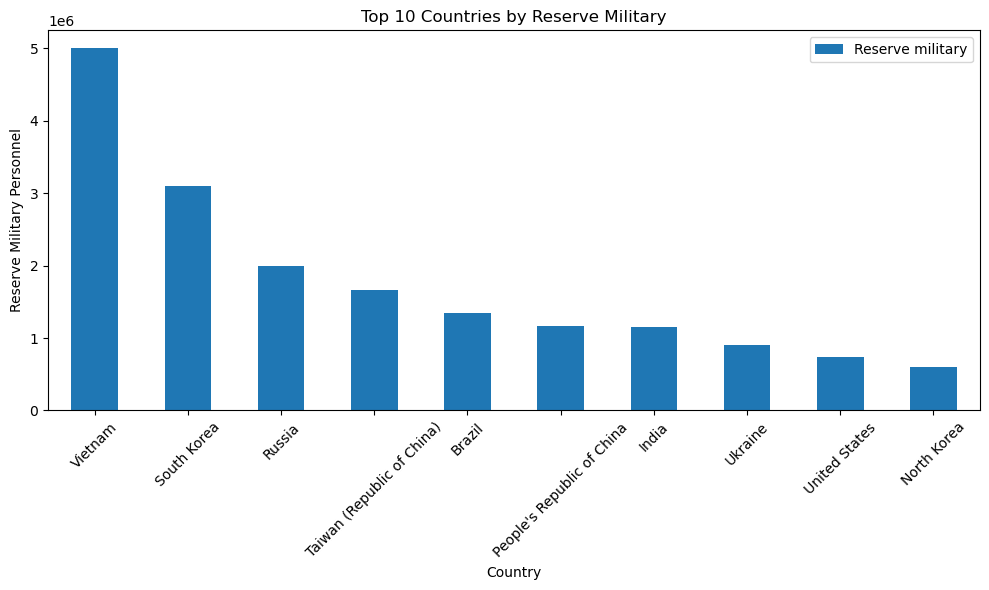

In [14]:
# plotting the data

import matplotlib.pyplot as plt

df.nlargest(10, 'Reserve military').plot(
    x='Country',
    y='Reserve military',
    kind='bar',
    figsize=(10,6),
    title='Top 10 Countries by Reserve Military'
)
plt.xticks(rotation=45)
plt.ylabel('Reserve Military Personnel')
plt.tight_layout()
plt.show()

In [15]:
# Group countries by manpower metric
df['Strength_Level'] = pd.cut(df['Active military'],
                              bins=[0, 50000, 200000, 500000, 1000000],
                              labels=['Low', 'Medium', 'High', 'Very High'])

# Counting the no. of countries fall into each of their respective categories
print(df['Strength_Level'].value_counts())

Strength_Level
Low          105
Medium        37
High          16
Very High      3
Name: count, dtype: int64


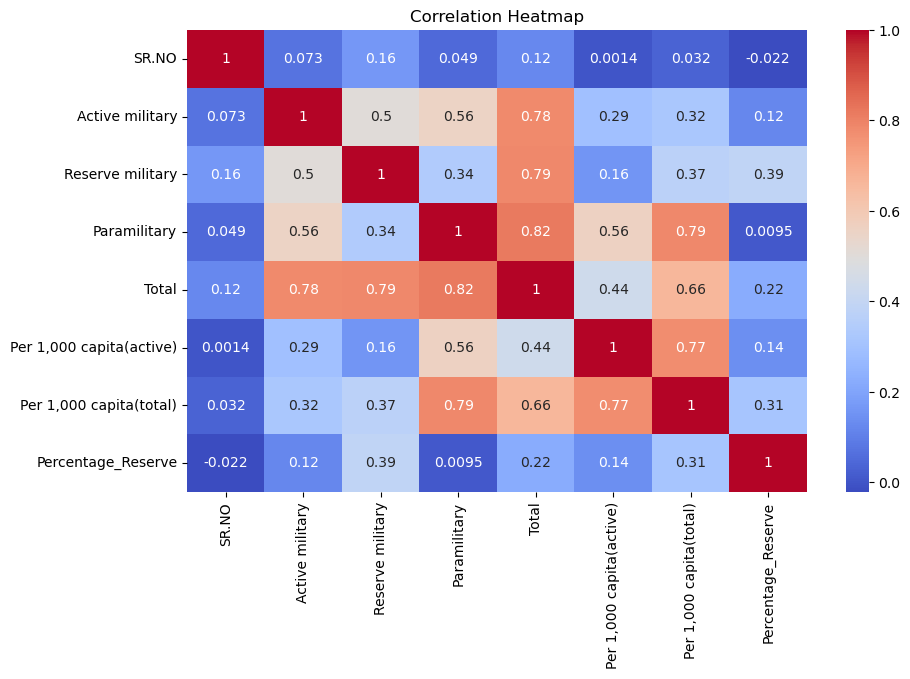

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Ploting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()